In [2]:
import matplotlib.pyplot as plt
import numpy as np

#load data

linesnames=np.genfromtxt('states.txt',delimiter='\n',dtype='U')
columnsnames=np.genfromtxt('crime_var.txt',delimiter='\n',dtype='U')
matrixX=np.loadtxt('USarrestdata.txt')
type(matrixX)

OSError: USarrestdata.txt not found.

In [10]:
columnsnames

array(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='<U8')

## US arrest data set

The data set contains the number of arrests per 100 000 residents for each of the following crimes: assault, murder and rape. It also contains the percentage of the population in each state living in urban area. 


A. Perform a PCA on this data

B. Do a biplot


<b>(a) Make a 2d plot with the names of the states on the pca1-pca2 plane. </b>

To start a figure properly, use
fig = figure() 
you can specify the size of the figure if you want, e.g. fig=figure(figsize=(9,7))

Then for each plot in the figure, you define axes. For the first plot:
ax1 = fig.add_subplot(1,1,1) 
The meaning of (1,1,1) is (1rst line, 1rst column, 1 = only one plot here). 

More info, see python_basic.ipynb (section Plots) 

You are now ready to attach 'things' to the plot, to do so you always start by "ax1.":

ax1.plot(yourdata) / ax1.scatter(yourdata) /... 
ax1.set_xlim(xmin,xmax)
ax1.set_xlabel('myxlabel')
etc.. 

rem: if you want to print the name of the states, use a for loop and the ax1.annotate function (e.g. ax1.annotate('california', (x_california, y_california), ha='center') 


<b>(b) Represent the loading vectors on the plot. </b>

typically you have more plots let's say 2 plots (then you would have written ax1 = fig.add_subplot(1,1,2), and for the second plot, you could add the axis ax2 = fig.add_subplot(1,2,2). Here however we want to put axis on the same plot and represent the loading vectors on top of the scatter data plot. 

To do so define the second set of axis as

ax2 = ax1.twinx().twiny()

Then use again a for loop (over the loading vectors) and now use the ax2.arrow function (e.g.     ax2.arrow(x_origin,y_origin,x_tip, y_tip,head_width=.05, head_length=.005,overhang=10,length_includes_head=True,fill=False)

You can also annotate the tip of the arrow: 
ax2.annotate('my annotation', xy=(x_{tip of arrow}, y_{tip of arrow}]), xytext=(aa*x_{tip of arrow}, aa*y_{tip of arrow}]),color='orange')  [rem: aa is a little offset to put the annotation a bit away from the tip, take aa=1.07 for instance)


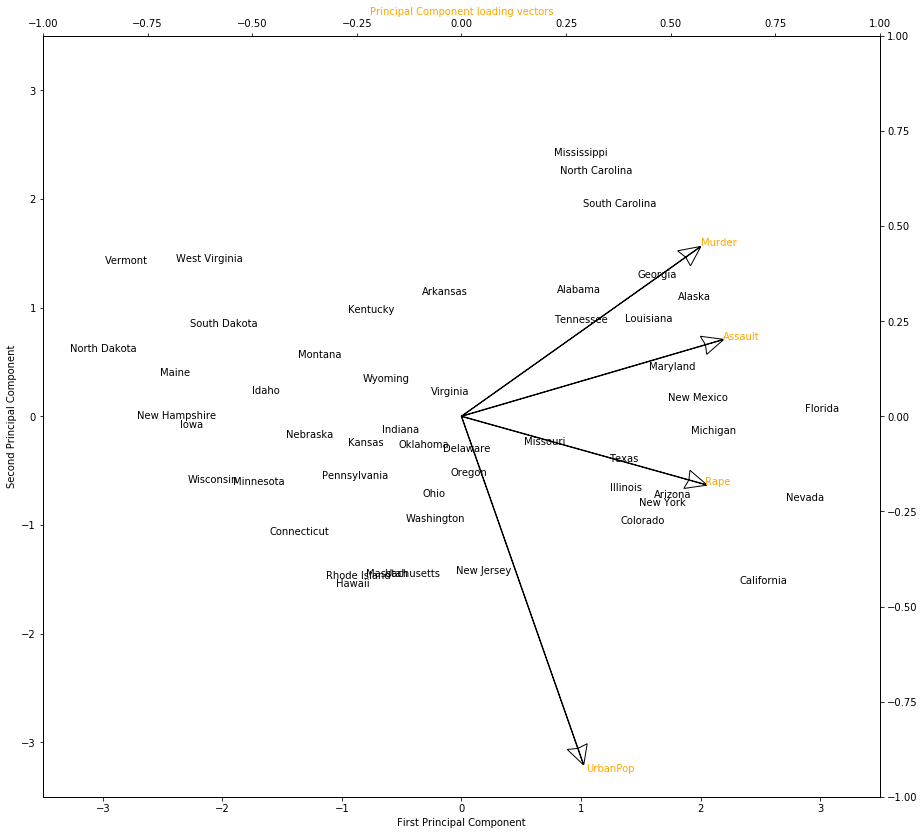

C. Compute the variance of the murder, assault, rape and urbanpop variables. 

Compute the variance of pca1 and pca2. 

What can you conclude? 
   

D. Do a 'Scree plot' 

Compute the percentage of the variance explained by the various pca components 
Plot the result in a 'scree plot'

E. Extra questions


- Which variables influence most the first principal component? 

- Which variable influence most the second principal compontent? 

- Explain with your words how to interpret the loading vectors

- Is the assault variable more corrolated with rape or urban population? 

- Suppose that you do not like crimes in general. Where should you live? 





## Gradient descent - basics

(https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f)

Generate data from a known model: 

$y = \beta_0  + \beta_1 x$. 


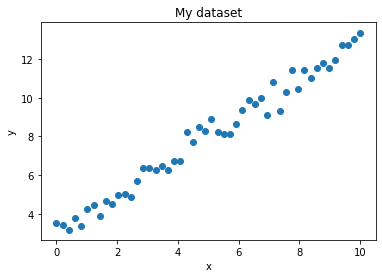

In [5]:
def myfunc(X,theta):
    x = np.array([1.0,X])
    return x.dot(theta)

x = np.linspace(0,10)
y = np.array([ myfunc(x[kk],np.array([3.0,1.0])) + np.random.normal(0,.4) for kk in range(len(x))])
plt.title('My dataset')
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

(1) Define a cost function : do a the sum of the squared differences between data points and the one predicted by a linear fit (the "myfunc" function) with parameters theta (an array containing the intercept and the slope). 

Fill in the definition here under:

In [110]:
def  cal_cost(theta,x,y,myfunc):    

    return cost

cal_cost(np.array([1.1,2.3]),x,y,myfunc)



18.011915851106423

In [6]:
len(x)

50

(2) Perform a gradient descent. This amounts to calculate the derivative of the cost function wrt to the variables we want to optimize. In our case, we want to optimize $\theta$ (ie the intercept and slope). You need to "feed" the gradient descent function with an initial guess for the parameters. The simplest implementation of a gradient descent specify beforehand how many iterations it will do. The learning rate $\eta$ correspond to the size of the step you take at each iteration. 

Basically, you need to compute the gradient of the cost function

$\nabla$ cost = [d cost / d $\theta_0$, d cost /  $\theta_1$]Â 

and update the values of theta : $\theta \rightarrow \theta + \eta \nabla$ cost. 

Fill in the for loop:

In [114]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=10000):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        1) compute grandient
        2) update theta by theta + eta gradient
        3) new value of the cost function
    return theta , cost_history, theta_history

gradient_descent(x,y,[1.2,3.4])

array([2.88885179, 1.01457779])

## Kullback Leibler divergence, perplexity and Shannon entropy 

As a (useless) toymodel to understand t-SNE, pick-up random positions in 1d (you can use the function np.random.normal):

Plot this 1d dataset. (rem: I use a regular plt.plot(x,y,'o') with y = np.ones(number_of_points) and add "plt.yticks([])" to remove the y ticks as they have no meaning here)

Choose one position (the "m" position), and build up Pm|l : 

$ p_{m| \ell} = \exp{ ( - || x_m - x_\ell ||^2 /( 2 \, \sigma^2_\ell) )} /N $

To simplify things, we will assume that the variance $\sigma^2_\ell$ is chosen to be 1 independently of the fixed sample. We will investigate later how to fix $\sigma$ depending of the sample chosen by imposing a fixed perplexity. 

Plot this 1d distribution (in a similar way you plotted this 1d dataset, for better visualisation I used plt.plot(x,y,,'|', markersize=12)

Check that the distribution is normalized:

Compute the entropy of the distribution and the perplexity: 

Play around with the sigma_l you choose, and the spreadness of your points. 


Convince yourself about the following important properties of the entropy of a discrete distribution by checking on examples: 

1) it is zero if and only if one of the $p_i$ is one and all the others are zero. 

2) it is maximal if all $p_i$'s are equal. 

=> <b> Entropy is a measure of the 'unknown' we have in the result of picking-up a sample from our discrete probability distribution.</b> If we are in the case 1) just described above, we know for sure the outcome of picking up a sample at random from samples obeying this probability distribution. Therefore the entropy is zero in this case. If we are in case 2) the entropy is maximal because there is an equal chance of picking up any of the samples. 


Draw another set of points and compute the Kullback-Leibler divergence between the two associated distributions.
When is the KL increasing or decreasing (when distribution are more similar or more different)? 

## t-SNE : use a black box tSNE algorithm on the US arrest dataset